<a href="https://colab.research.google.com/github/Waleed-Azam/Master_NTNU_Waleed/blob/master/FSA_Synthetic_data_and_STB_data_Predicitons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Prepare the nice data set
from sklearn.model_selection import train_test_split
# univariate cnn example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.preprocessing import MinMaxScaler
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np 
import matplotlib.pyplot as plt


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1Bi2fJZw6Vhj7dyP7Ad6qtPsYf5LevEm4'})
downloaded_2= drive.CreateFile({'id':'12ZLwEA-DL3BWgcnmlET-2PcNdZGDGr0h'})

In [ ]:
#Importing all the libraries
import numpy as np
import numpy as geek 
from keras.layers import Input, Dense, LSTM, multiply, concatenate, Activation, Masking, Reshape
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense, LSTM, multiply, concatenate, Activation, Masking, Reshape
from keras.layers import BatchNormalization, GlobalAveragePooling1D, Permute, Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.optimizers import RMSprop, Adam
from keras.layers import LSTM, Activation 
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import pandas as pd
downloaded.GetContentFile('Master_thesis_Data.csv')
#downloaded_1.GetContentFile('Test_17_sea.csv')
downloaded_2.GetContentFile('April_Without_Fish.csv')
#df1 = pd.read_csv('Test_17_sea.csv') 
df3 = pd.read_csv('April_Without_Fish.csv') 
df2 = pd.read_csv('Master_thesis_Data.csv')
df3

,DVL_1,DVL_2,DVL_3,DVL_4,Down,Heading
0,0.000000,0.000000,0.000000,0.0,0.00,0.00
1,0.000000,0.000000,0.000000,0.0,0.00,0.00
2,0.000000,0.000000,0.000000,0.0,0.00,0.00
3,0.000000,0.000000,0.000000,0.0,0.04,3.90
4,0.000000,0.000000,0.000000,0.0,0.08,3.96
...,...,...,...,...,...,...
3056,0.671787,4.036387,4.954006,0.0,0.00,4.64
3057,0.671787,4.087367,4.750091,0.0,0.00,4.65
3058,0.722766,4.138345,4.750091,0.0,0.00,4.67
3059,0.722766,4.138345,4.750091,0.0,0.00,4.69


In [ ]:
import pandas as pd
df2 = pd.read_csv('Master_thesis_Data.csv') 
#df2=df2.drop(columns=['Unnamed: 13', 'Unnamed: 14'])
#Cleaning the data, for mainly removing the NaN value
df2["Time"] = df2["Time"].fillna(0)
df2["DVL1"] = df2["DVL1"].fillna(0)
df2["DVL2"] = df2["DVL2"].fillna(0)
df2["DVL3"] = df2["DVL3"].fillna(0)
df2["DVL4"] = df2["DVL4"].fillna(0)
df2["DVL1_S"] = df2["DVL1_S"].fillna(0)
df2["DVL2_S"] = df2["DVL2_S"].fillna(0)
df2["DVL3_S"] = df2["DVL3_S"].fillna(0)
df2["DVL4_S"] = df2["DVL4_S"].fillna(0)
df2["ROV6DOF"] = df2["ROV6DOF"].fillna(0)
df2["ROV6DOF.1"] = df2["ROV6DOF.1"].fillna(0)
df2["ROV6DOF.2"] = df2["ROV6DOF.2"].fillna(0)
df2["ROV6DOF.3"] = df2["ROV6DOF.3"].fillna(0)

df2


,Time,DVL1_S,DVL2_S,DVL3_S,DVL4_S,DVL1,DVL2,DVL3,DVL4,ROV6DOF,ROV6DOF.1,ROV6DOF.2,ROV6DOF.3
0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.00
1,0.0,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.00,0.0,0.00,0.00
2,0.1,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.00,0.0,0.00,0.00
3,0.2,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.00,0.0,0.00,0.00
4,0.3,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84986,8498.5,2.692643,1.8,2.620548,2.615895,2.692643,2.628101,2.620548,2.615895,5.27,16.8,4.87,-3.37
84987,8498.6,2.692682,1.8,2.620243,2.615925,2.692682,2.629319,2.620243,2.615925,5.25,16.8,4.87,-3.37
84988,8498.7,2.692715,1.8,2.619866,2.615951,2.692715,2.630637,2.619866,2.615951,5.22,16.8,4.87,-3.37
84989,8498.8,2.692740,1.8,2.619450,2.615970,2.692740,2.631916,2.619450,2.615970,5.20,16.8,4.87,-3.36


In [ ]:
df2.drop(84990) 
df2=df2.drop(84988)
df2=df2.drop(84987)
df2.drop(84990)
df2=df2.drop(84985)
df2=df2.drop(84990)
df2=df2.drop(84984)
df2=df2.drop(84983)
df2=df2.drop(84982)
df2=df2.drop(84981)
df2=df2.drop(84980)
df2=df2.drop(84986)
df2=df2.drop(84989)
df2

,Time,DVL1_S,DVL2_S,DVL3_S,DVL4_S,DVL1,DVL2,DVL3,DVL4,ROV6DOF,ROV6DOF.1,ROV6DOF.2,ROV6DOF.3
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.00
1,0.0,20.0,20.0,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,0.00,0.0,0.00,0.00
2,0.1,20.0,20.0,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,0.00,0.0,0.00,0.00
3,0.2,20.0,20.0,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,0.00,0.0,0.00,0.00
4,0.3,20.0,20.0,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84975,8497.4,0.8,0.3,2.621668,1.8,2.691185,2.610809,2.621668,2.614601,5.55,17.0,4.87,-3.39
84976,8497.5,0.8,0.3,2.621745,1.8,2.691401,2.612374,2.621745,2.614807,5.52,17.0,4.87,-3.38
84977,8497.6,0.8,0.3,2.621804,1.8,2.691634,2.614254,2.621804,2.615026,5.50,17.0,4.87,-3.38
84978,8497.7,0.8,0.3,2.621820,1.8,2.691802,2.615765,2.621820,2.615181,5.47,16.9,4.87,-3.38


In [ ]:
df3=df3.drop(0) 
df2


,Time,DVL1_S,DVL2_S,DVL3_S,DVL4_S,DVL1,DVL2,DVL3,DVL4,ROV6DOF,ROV6DOF.1,ROV6DOF.2,ROV6DOF.3
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.00
1,0.0,20.0,20.0,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,0.00,0.0,0.00,0.00
2,0.1,20.0,20.0,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,0.00,0.0,0.00,0.00
3,0.2,20.0,20.0,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,0.00,0.0,0.00,0.00
4,0.3,20.0,20.0,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84975,8497.4,0.8,0.3,2.621668,1.8,2.691185,2.610809,2.621668,2.614601,5.55,17.0,4.87,-3.39
84976,8497.5,0.8,0.3,2.621745,1.8,2.691401,2.612374,2.621745,2.614807,5.52,17.0,4.87,-3.38
84977,8497.6,0.8,0.3,2.621804,1.8,2.691634,2.614254,2.621804,2.615026,5.50,17.0,4.87,-3.38
84978,8497.7,0.8,0.3,2.621820,1.8,2.691802,2.615765,2.621820,2.615181,5.47,16.9,4.87,-3.38


In [ ]:
t=df2['Time']
Tdata=df2['DVL1_S']
X1=np.array(Tdata)
Tdata2=df2['DVL2_S']
X2=np.array(Tdata2)
Tdata3=df2['DVL3_S']
X3=np.array(Tdata)
Tdata4=df2['DVL4_S']
X4=np.array(Tdata4)
Tdata5=df2['ROV6DOF']
X5=np.array(Tdata5)
Tdata6=df2['ROV6DOF.1']
X6=np.array(Tdata6)
Tdata7=df2['ROV6DOF.2']
X7=np.array(Tdata7)
Tdata8=df2['ROV6DOF.3']
X8=np.array(Tdata8)

In [ ]:
# Stacking the two arrays along axis 0 
out_arr1_X_training = geek.stack((X1, X2, X3,X4, X5,X6,X7,X8), axis = 0) 
print ("Output stacked array along axis 0:\n ", out_arr1_X_training) 
print ("Output Shape:\n ", out_arr1_X_training.shape) 

Output stacked array along axis 0:
  [[ 0.   20.   20.   ...  0.8   0.8   0.8 ]
 [ 0.   20.   20.   ...  0.3   0.3   0.3 ]
 [ 0.   20.   20.   ...  0.8   0.8   0.8 ]
 ...
 [ 0.    0.    0.   ... 17.   16.9  16.9 ]
 [ 0.    0.    0.   ...  4.87  4.87  4.87]
 [ 0.    0.    0.   ... -3.38 -3.38 -3.38]]
Output Shape:
  (8, 84980)


In [ ]:
X= out_arr1_X_training
X = X.transpose((1,0))
X.shape

(84980, 8)

In [ ]:
Tdata1=df2['DVL1']
y1=np.array(Tdata1)
Tdata22=df2['DVL2']
y2=np.array(Tdata22)
Tdata33=df2['DVL3']
y3=np.array(Tdata33)
Tdata44=df2['DVL4']
y4=np.array(Tdata44)

In [ ]:
# Stacking the two arrays along axis 0 
out_lab1_Target = geek.stack((y1, y2, y3, y4), axis = 0) 
print ("Output stacked array along axis 0:\n ", out_lab1_Target) 
print ("Labels Shape :\n ", out_lab1_Target.shape) 

Output stacked array along axis 0:
  [[ 0.       20.       20.       ...  2.691634  2.691802  2.691982]
 [ 0.       20.       20.       ...  2.614254  2.615765  2.617577]
 [ 0.       20.       20.       ...  2.621804  2.62182   2.621799]
 [ 0.       20.       20.       ...  2.615026  2.615181  2.615344]]
Labels Shape :
  (4, 84980)


In [ ]:
y= out_lab1_Target

In [ ]:
y=y.transpose((1,0))

In [ ]:
# mlp for multi-output regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
X.shape

(84980, 8)

In [ ]:
y_train=y[:64980]

In [ ]:
X_train=X[:64980]

In [ ]:
x_val=X[64980:74980]

In [ ]:
x_val.dtype

dtype('float64')

In [ ]:
y_val=y[64980:74980]

In [ ]:
x_test=X[-10000:]

In [ ]:
y_test=y[-10000:]

In [ ]:
n_features=4

In [ ]:
n_steps=1

In [ ]:
import keras

In [ ]:
X_train.shape

(64980, 8)

In [ ]:
y_train.shape

(64980, 4)

In [ ]:
x_val.shape

(10000, 8)

In [ ]:
y_val.shape

(10000, 4)

In [ ]:
import tensorflow as tf

In [ ]:
from keras.layers import Dropout

In [ ]:
y_train.shape

(64980, 4)

In [ ]:
y_train1=y_train[:5783]

In [ ]:
y_train1.shape

(5783, 4)

In [ ]:
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D, Flatten, Reshape 
from keras.models import Model
from keras import backend as K
input_img=Input(shape=(n_steps, 8))
#input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format
# Dropout 

x = Conv1D(16, 3, activation='relu', padding='same')(input_img)
x= MaxPooling1D(2, padding= 'same')(x)
x= Dropout(0.5) (x)
x= Dropout(0.3) (x)
x = Conv1D(16, 3, activation='relu', padding='same')(x)
x= MaxPooling1D(2, padding= 'same')(x)
x= Dropout(0.5) (x)
#x = Conv1D(16, 3, activation='relu', padding='same')(x)
x= MaxPooling1D(2, padding= 'same')(x)
x= Dropout(0.5) (x)
# at this point the representation is (4, 4, 8) i.e. 128-dimensional
x= Flatten()(x)
decoded = Dense(n_features*n_steps, activation='linear')(x)
outputs= Reshape((n_steps, n_features))(decoded)
#tf.reshape(tensor, shape, name=None)
autoencoder = Model(input_img, outputs)
opt = keras.optimizers.Adam(learning_rate=0.0001)
autoencoder.compile(opt, loss='mse')

In [ ]:
X_train.shape

(64980, 8)

In [ ]:
X_train=X_train.reshape(64980,1,8)

In [ ]:
y_train.shape

(64980, 4)

In [ ]:
y_train=y_train.reshape(64980,1,4)

In [ ]:
x_val=x_val.reshape(10000,1,8)

In [ ]:
y_val=y_val.reshape(10000,1,4)

In [ ]:
from keras.callbacks import TensorBoard, EarlyStopping

es =EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=50,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)
history=autoencoder.fit(X_train, y_train,
                epochs=1500,
                batch_size=32,
                shuffle=True,
                validation_data=(x_val, y_val), 
                callbacks= [es], verbose=1)

# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#Early Stopping.. Can be a wise option to observe
#tf.keras.callbacks.EarlyStopping(
   # monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto',
  #  baseline=None, restore_best_weights=False
#)

Epoch 1/1500
2031/2031 [==============================] - 4s 2ms/step - loss: 5.4524 - val_loss: 2.4287
Epoch 2/1500
2031/2031 [==============================] - 3s 2ms/step - loss: 3.2803 - val_loss: 1.2816
Epoch 3/1500
2031/2031 [==============================] - 3s 2ms/step - loss: 2.2842 - val_loss: 0.6785
Epoch 4/1500
2031/2031 [==============================] - 3s 2ms/step - loss: 1.7904 - val_loss: 0.4419
Epoch 5/1500
2031/2031 [==============================] - 4s 2ms/step - loss: 1.4378 - val_loss: 0.2980
Epoch 6/1500
2031/2031 [==============================] - 3s 2ms/step - loss: 1.2373 - val_loss: 0.2192
Epoch 7/1500
2031/2031 [==============================] - 4s 2ms/step - loss: 0.9914 - val_loss: 0.1540
Epoch 8/1500
2031/2031 [==============================] - 3s 2ms/step - loss: 0.8444 - val_loss: 0.1085
Epoch 9/1500
2031/2031 [==============================] - 3s 2ms/step - loss: 0.7238 - val_loss: 0.0724
Epoch 10/1500
2031/2031 [==============================] - 3s 2m

dict_keys(['loss'])


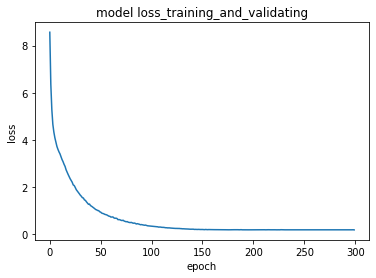

In [ ]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
# History for Dropout 1st layer every layer after the maxpooling, 1e-3 in the first 2 layers and in the third layer, the regularization rate is 1e-01
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss_training_and_validating')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Model is trained now, for the value of all the stuff one need to performing more and more implementations

In [ ]:
# creating more data set
# Here I will try to do the things according to what Walter wanted me to do here.

In [ ]:
# Generating a data set from the available set of resources we have

In [ ]:
# 1 Synthetic
# 2 Data without Fish
# 3 getting the data from the Herman and the Walter test sets, to get better results

In [ ]:
# Fethcing the KALMAN_Herman_1

# Working it as a testing data to see what can I get it form 

In [ ]:
downloaded_3= drive.CreateFile({'id':'1ngy7C_GNs9BZs30K-QdQGwBDcu6dSABu'})
#https://drive.google.com/file/d/1ngy7C_GNs9BZs30K-QdQGwBDcu6dSABu/view?usp=sharing
#https://drive.google.com/file/d/1ngy7C_GNs9BZs30K-QdQGwBDcu6dSABu/view?usp=sharing

In [ ]:
downloaded_3.GetContentFile('Kalman_Herman_1.csv')
#downloaded_1.GetContentFile('Test_17_sea.csv')
#downloaded_2.GetContentFile('April_Without_Fish.csv')
#df1 = pd.read_csv('Test_17_sea.csv') 
df7 = pd.read_csv('Kalman_Herman_1.csv') 
#df2 = pd.read_csv('Master_thesis_Data.csv')
df7

,DVL1S,DVL2S,DVL3S,DVL4S,North,East,Down,Heading,DVL1,DVL2,DVL3,DVL4
0,2.608981,1.691363,1.436469,1.946257,-8.262226,0.935748,2.92,0.876155,2.608981,1.691363,1.436469,1.946257
1,2.507024,1.742342,1.436469,1.895278,-8.262226,0.935748,2.88,0.862193,2.507024,1.742342,1.436469,1.895278
2,2.456045,1.742342,1.436469,1.895278,-8.218841,0.841404,2.88,0.862193,2.456045,1.742342,1.436469,1.895278
3,2.456045,1.742342,1.436469,1.844299,-8.218841,0.841404,2.88,0.862193,2.456045,1.742342,1.436469,1.844299
4,2.405066,1.793321,1.436469,1.844299,-8.218841,0.841404,3.04,0.881391,2.405066,1.793321,1.436469,1.844299
...,...,...,...,...,...,...,...,...,...,...,...,...
5778,1.691363,1.946257,1.487448,1.334512,-7.570821,1.672850,4.36,0.513127,1.691363,1.946257,1.487448,1.334512
5779,1.691363,1.997236,1.487448,1.334512,-7.570821,1.672850,4.36,0.492183,1.691363,1.997236,1.487448,1.334512
5780,1.691363,1.997236,1.487448,1.385490,-7.624272,1.511872,4.40,0.432842,1.691363,1.997236,1.487448,1.385490
5781,1.691363,1.946257,1.487448,1.385490,-7.624272,1.511872,4.36,0.368264,1.691363,1.946257,1.487448,1.385490


In [ ]:
c= df7['DVL1S']

In [ ]:
c1=df7['DVL2S']

In [ ]:
c2=df7['DVL3S']
c3=df7['DVL4S']

In [ ]:
c4=df7['North']

In [ ]:

c6=df7['Down ']

In [ ]:
c9= df7['East ']

In [ ]:


c7=df7['Heading']

In [ ]:
c.dtype

dtype('float64')

In [ ]:
c.shape

(5783,)

In [ ]:
import numpy as np

In [ ]:
c=np.array(c)

In [ ]:
c.dtype

dtype('float64')

In [ ]:
c1=np.array(c1)
c2=np.array(c2)
c3=np.array(c3)

In [ ]:
c4=np.array(c4)
c9=np.array(c9)
c6=np.array(c6)
c7=np.array(c7)


In [ ]:
cd1=df7['DVL1']
cd2=df7['DVL2']
cd3=df7['DVL3']
cd4=df7['DVL4']

In [ ]:
cd1=np.array(cd1)
cd2=np.array(cd2)
cd3=np.array(cd3)
cd4=np.array(cd4)


In [ ]:
# Stacking the two arrays along axis 0 
Herman_Kalman_1 = geek.stack((c, c1, c2, c3, c4, c9, c6, c7), axis = 0) 
print ("Output stacked array along axis 0:\n ", Herman_Kalman_1) 
print ("Labels Shape :\n ", Herman_Kalman_1.shape) 

Output stacked array along axis 0:
  [[2.608981  2.507024  2.456045  ... 1.691363  1.691363  1.691363 ]
 [1.691363  1.742342  1.742342  ... 1.997236  1.946257  1.946257 ]
 [1.436469  1.436469  1.436469  ... 1.487448  1.487448  1.487448 ]
 ...
 [0.9357475 0.9357475 0.8414043 ... 1.511872  1.511872  1.511872 ]
 [2.92      2.88      2.88      ... 4.4       4.36      4.32     ]
 [0.8761553 0.8621927 0.8621927 ... 0.4328417 0.3682645 0.3682645]]
Labels Shape :
  (8, 5783)


In [ ]:
Herman_Kalman_1=Herman_Kalman_1.transpose(1,0)

In [ ]:
Herman_Kalman_1.shape

(5783, 8)

In [ ]:
Herman_Kalman_1y=Herman_Kalman_1.reshape(5783,1,8)

In [ ]:
Herman_Kalman_1d=Herman_Kalman_1d.transpose(1,0)

In [ ]:
Herman_Kalman_1d=Herman_Kalman_1d.reshape(5783,1,4)

In [ ]:
K1= autoencoder.predict(Herman_Kalman_1y)

In [ ]:
t.shape

(84980,)

In [ ]:
K1=K1.reshape((K1.shape[0]*K1.shape[1]), K1.shape[2])

In [ ]:
t_k1= t[:5783]

In [ ]:
K1.shape

(5783, 4)

In [ ]:
K1_1= K1[:,0]


In [ ]:
K1_2= K1[:,1]

In [ ]:
K1_3= K1[:,2]
K1_4= K1[:,3]

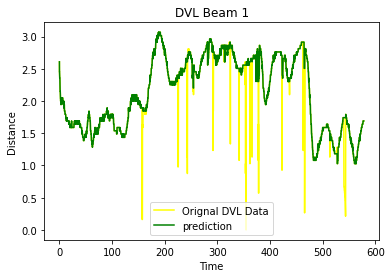

In [ ]:
fax = plt.gca()
plt.plot(t_k1,c, color='yellow', label='Orignal DVL Data')
plt.plot(t_k1,K1_1, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 1')
plt.legend()

plt.show()

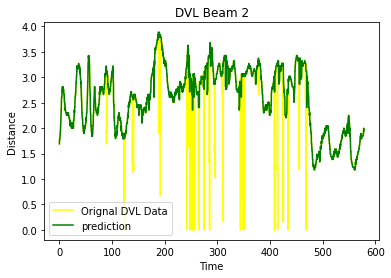

In [ ]:
fax = plt.gca()
plt.plot(t_k1,c1, color='yellow', label='Orignal DVL Data')
plt.plot(t_k1,K1_2, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 2')
plt.legend()

plt.show()

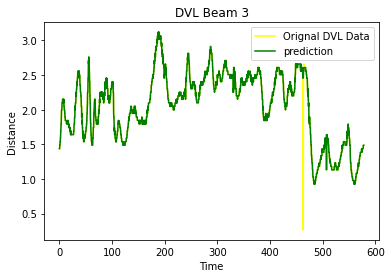

In [ ]:
fax = plt.gca()
plt.plot(t_k1,c2, color='yellow', label='Orignal DVL Data')
plt.plot(t_k1,K1_3, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 3')
plt.legend()

plt.show()

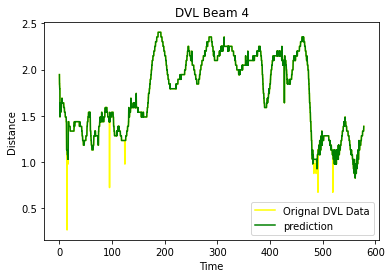

In [ ]:
fax = plt.gca()
plt.plot(t_k1,c3, color='yellow', label='Orignal DVL Data')
plt.plot(t_k1,K1_4, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 4')
plt.legend()

plt.show()